## By population, by locus Fst values

#### From Stacks batch 8


<br>
I ran the final filtered genepops through `GENEPOP` to get FST and FIS values, and associated p values. These were found across all populations. 

1. FST per locus p values (all) <-- in case I want to make an FST v. base pair plot ( medium divergence)
2. FST per locus p values (south) <-- in case I want to make an FST v. base pair plot ( low divergence )
3. FST per locus per population
4. FST pairwise (parsed here, saved in results)
5. FST pairwise p values (parsed here, saved in results)
6. FIS per locus per population


<br>
<br>
<br>

### Fst Per Locus P values

genepop `option 3 --> suboption 2`
<br>
Found in the file: `batch_8...txt.G`

In [1]:
cd ../analyses/genepop/batch8

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/genepop/batch8


In [10]:
infile = open("batch_8_filteredMAF_filteredIndivids30_filteredLoci_filteredHWE_filteredRepsC.txt.G", "r")
outfile = open("batch_8_final_filtered_allpops_perlocus_pval.txt", "w")

#skip through most of beginning of file until you hit the by-locus p value chart
line = infile.readline()
while not line.startswith("P-value across all loci"):
    line = infile.readline()
    
#skip through chart heading (4 lines)
i = 0
while i < 4:
    print infile.readline()
    i += 1

outfile.write("locus\tpval\n")
for line in infile:
    linelist = line.strip().split()
    if len(linelist) > 1:
        outfile.write(linelist[0] + "\t" + linelist[1] + "\n")
outfile.close()
infile.close()

(Fisher's method)

-----------------------------------------------------

Locus          P-Value  

-------------  -------- 



### Fst Per Locus Per Population

genepop `option 5 --> suboption 1`

Found in the file: `batch_8...txt.INF`

In [11]:
!python ../../parseGenepopINFandFST.py -h

usage: parseGenepopINFandFST.py [-h] [-i INF] [-f FST] [-s] [-o OUTPUT]

optional arguments:
  -h, --help            show this help message and exit
  -i INF, --INF INF     .INF file output from genepop (mutually exclusive to
                        '-f')
  -f FST, --FST FST     .FST file output from genepop (mutually exclusive to
                        '-i')
  -s, --SNP             SNP position is in the locus name
  -o OUTPUT, --OUTPUT OUTPUT
                        name of output file


In [12]:
!python ../../parseGenepopINFandFST.py \
-i batch_8_filteredMAF_filteredIndivids30_filteredLoci_filteredHWE_filteredRepsC.txt.INF \
-o batch_8_final_filtered_INFparsed.txt

**PLOT**

In [32]:
infile = open("batch_8_final_filtered_INFparsed.txt", "r")
fst_list_all = []
fst_bypop_dict = {}
infile.readline() #header
for line in infile:
    fst = float(line.strip().split()[5].strip("NA"))
    pop = line.strip().split()[0]
    fst_list_all.append(fst)
    if pop not in fst_bypop_dict.keys():
        fst_bypop_dict[pop] = [fst]
    elif pop in fst_bypop_dict.keys():
        fst_vals = fst_bypop_dict[pop]
        fst_vals.append(fst)
        fst_bypop_dict[pop] = fst_vals
infile.close()

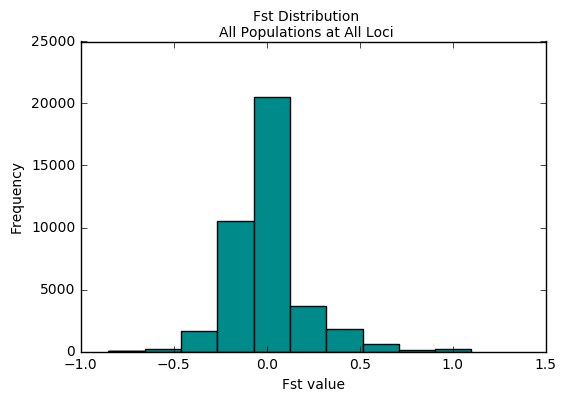

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(fst_list_all, color="darkcyan")
plt.suptitle("Fst Distribution\nAll Populations at All Loci")
plt.xlabel("Fst value")
plt.ylabel("Frequency")
plt.show()

In [35]:
plt.close()

In [36]:
sample_sizes = ['31', '32', '13', '25', '33', '40', '36', '22', '24']
i = 0

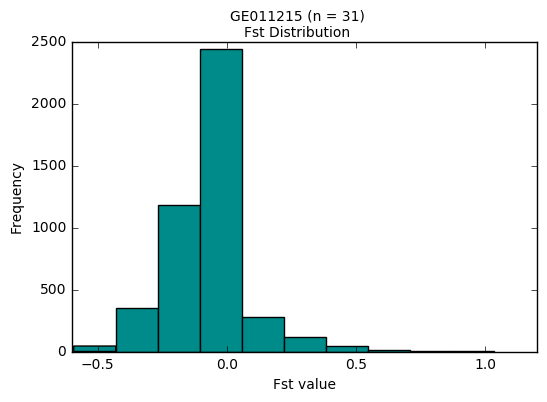

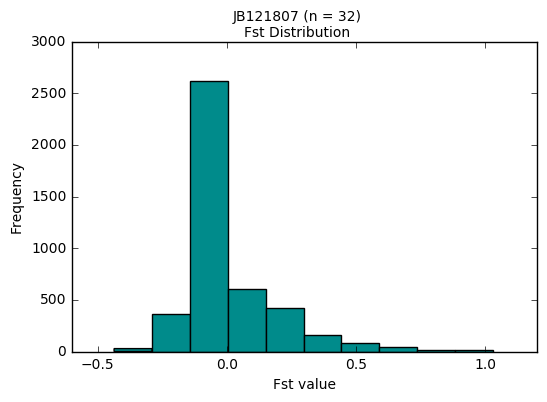

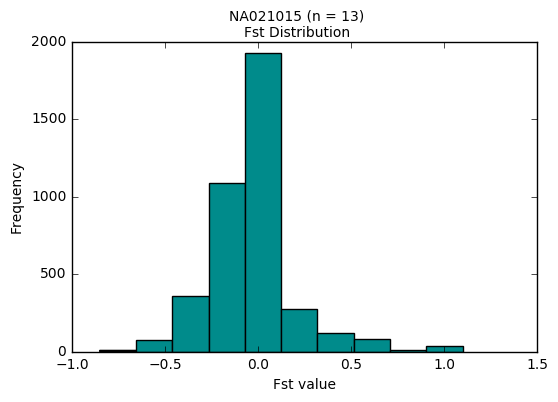

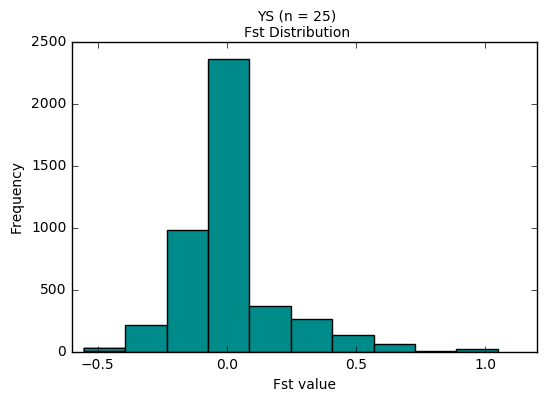

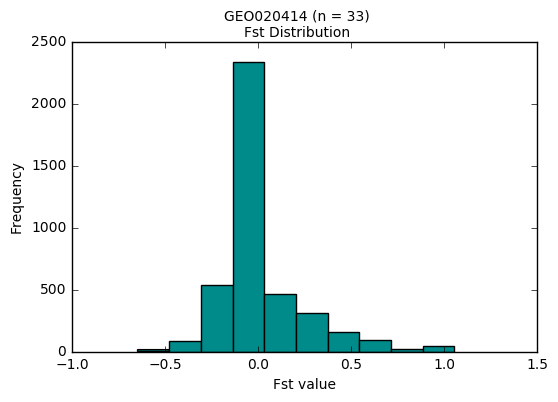

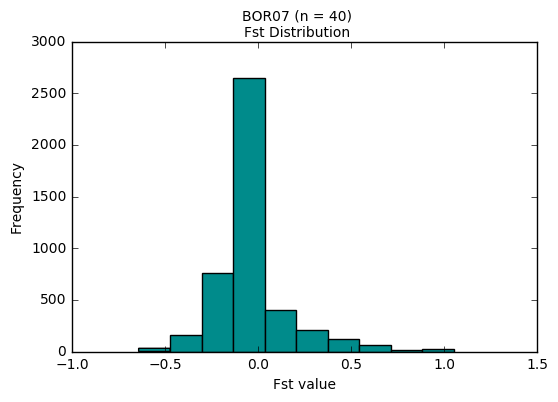

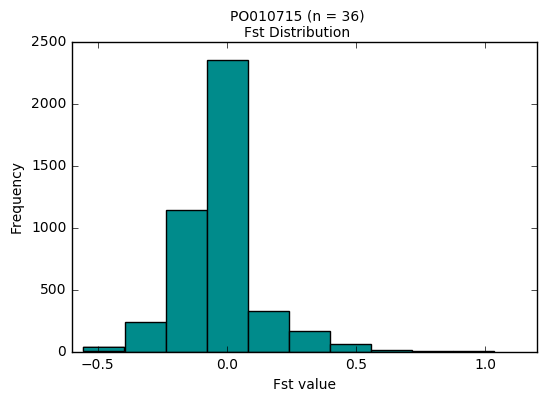

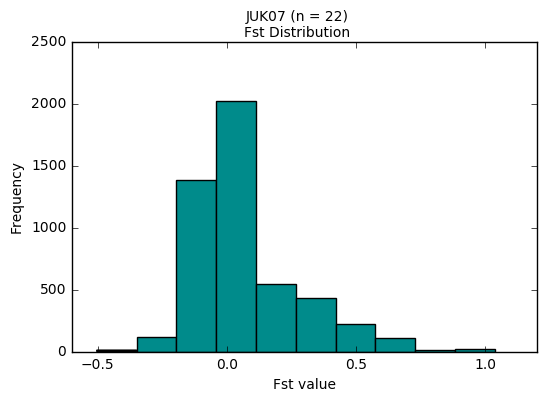

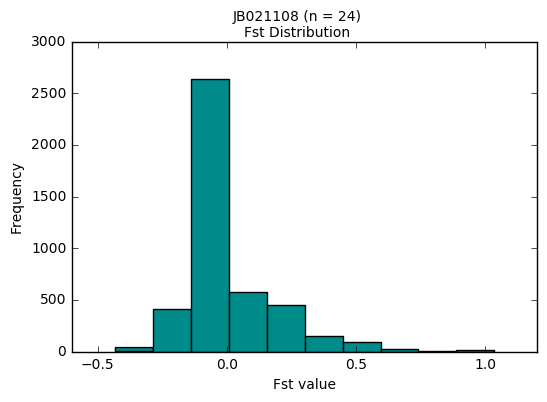

In [37]:
for pop in fst_bypop_dict.keys():
    titlelist = pop.split("_")
    title = titlelist[0]
    size = sample_sizes[i]
    i += 1
    plt.hist(fst_bypop_dict[pop], color="darkcyan")
    plt.suptitle(title + " (n = " + size + ")\nFst Distribution")
    plt.xlabel("Fst value")
    plt.ylabel("Frequency")
    plt.show()
    plt.close()

### Fst Per Population
genepop `option 5 --> suboption 2`: Allele identify For all population pairs

Found in file: `batch_8...txt.ST2` / `.txt.MIG`

See **Results** Notebook

### Fst Per Population P values
genepop `option 3 --> suboption 2 `: Genic differentiation for each population pair

Found in the file: `batch_8...txt.GE2`

See **Results** Notebook

### Fis Per Locus Per Population

genepop `option 5 --> suboption 1`

Found in the file: `batch_8...txt.INF`

See parsing script above.

In [13]:
infile = open("batch_8_final_filtered_INFparsed.txt", "r")
fis_list_all = []
fis_bypop_dict = {}
infile.readline() #header
for line in infile:
    fis = float(line.strip().split()[4])
    pop = line.strip().split()[0]
    fis_list_all.append(fis)
    if pop not in fis_bypop_dict.keys():
        fis_bypop_dict[pop] = [fis]
    elif pop in fis_bypop_dict.keys():
        fis_vals = fis_bypop_dict[pop]
        fis_vals.append(fis)
        fis_bypop_dict[pop] = fis_vals
infile.close()

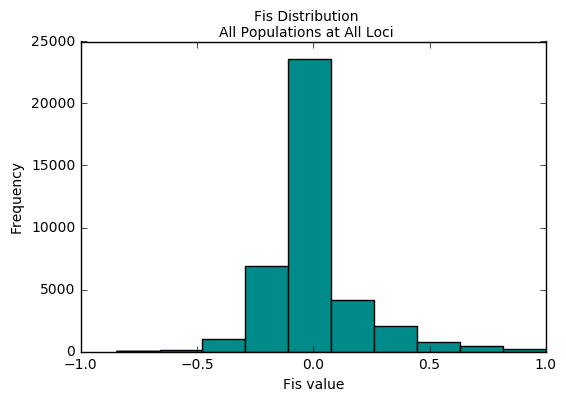

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(fis_list_all, color="darkcyan")
plt.suptitle("Fis Distribution\nAll Populations at All Loci")
plt.xlabel("Fis value")
plt.ylabel("Frequency")
plt.show()

In [15]:
plt.close()

In [20]:
sample_sizes = ['31', '32', '13', '25', '33', '40', '36', '22', '24']
i = 0

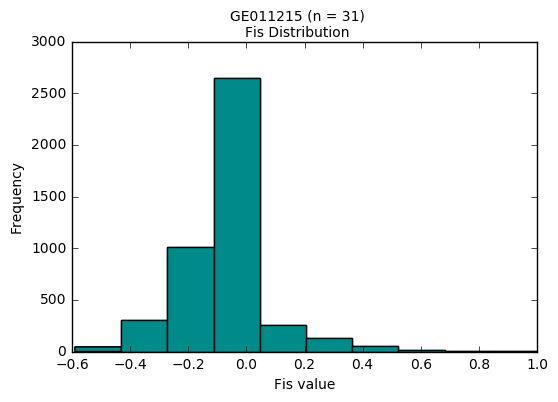

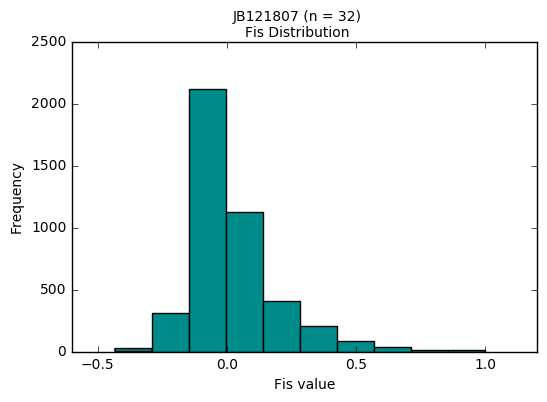

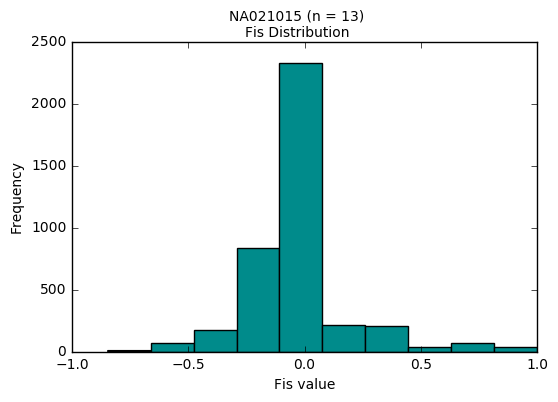

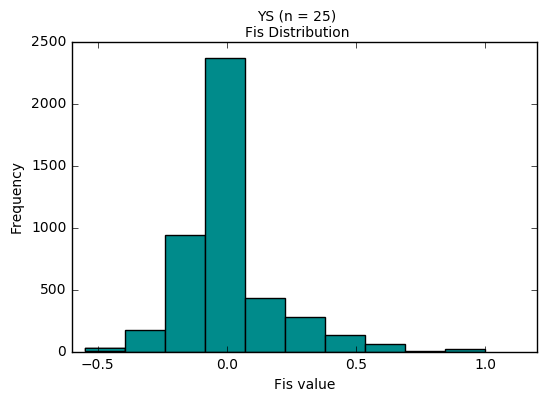

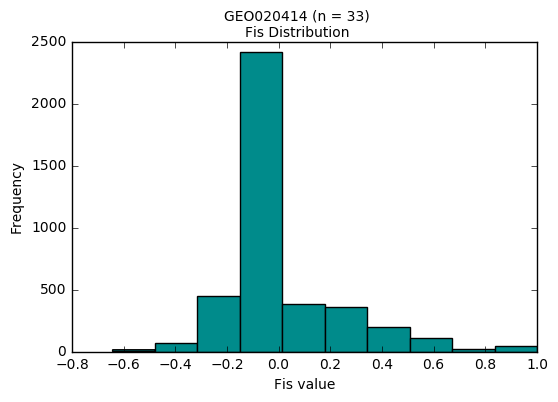

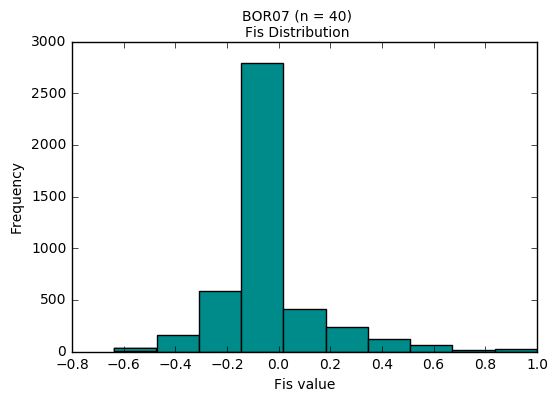

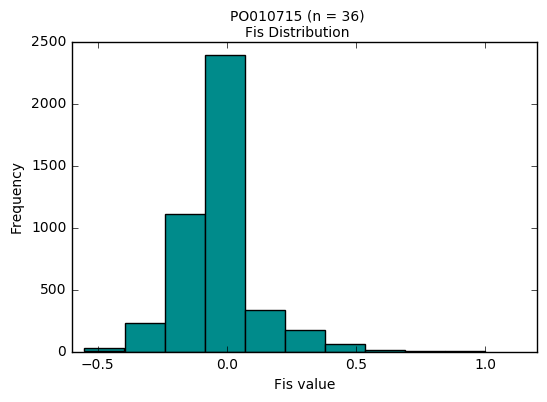

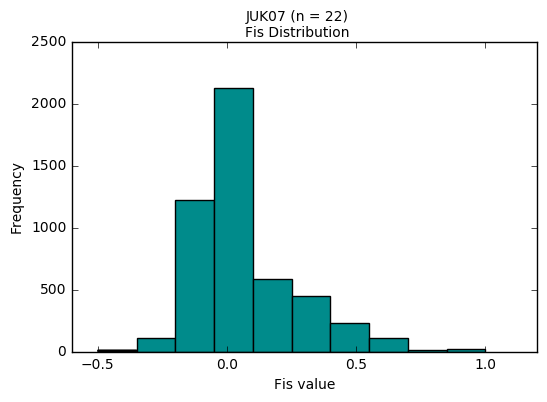

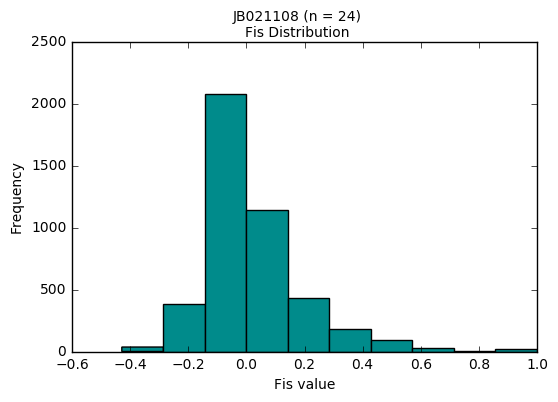

In [21]:
for pop in fis_bypop_dict.keys():
    titlelist = pop.split("_")
    title = titlelist[0]
    size = sample_sizes[i]
    i += 1
    plt.hist(fis_bypop_dict[pop], color="darkcyan")
    plt.suptitle(title + " (n = " + size + ")\nFis Distribution")
    plt.xlabel("Fis value")
    plt.ylabel("Frequency")
    plt.show()
    plt.close()

<br>

<br>
### Fis per population (overall)

#### Calculated using the `basicStats` function in `diveRsity`.

In [1]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/notebooks'

In [2]:
cd ../results

/mnt/hgfs/PCod-Korea-repo/results


In [5]:
infile = open("batch8_fis_perpop_diveRsity.txt", "r")
infile.readline()
infile.readline()
fis_list = []
pops_list = []
for line in infile:
    fis_list.append(float(line.strip().split()[1]))
    pops_list.append(line.strip().split()[0])
infile.close()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

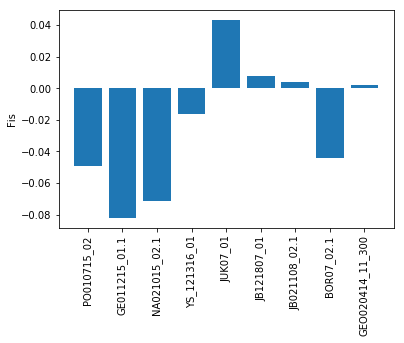

In [7]:
xpos = list(range(len(pops_list)))
plt.bar(xpos, fis_list)
plt.grid
plt.ylabel("Fis")
plt.xticks(xpos, pops_list, rotation = 90)
plt.show()

In [8]:
plt.close()

<br>
#### Calculated using genepop (option 5 >> suboption 2)

In [11]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/results'

In [12]:
infile = open("../stacks_b8_wgenome/batch_8_filteredMAF_filteredIndivids30_filteredLoci_filteredHWE_filteredRepsC.txt.DIV", "r")

line = infile.readline()
while not line.startswith("Statistics per sample over all loci with at least two individuals typed:"):
    line = infile.readline()

infile.readline()
infile.readline()
print infile.readline()

pops = []
fis = []
i = 1
for line in infile:
    if i < 10:
        linelist = line.strip().split()
        pops.append(linelist[0].split("_")[0])
        fis.append(float(linelist[3]))
    i += 1
infile.close()

--------------------------------------------



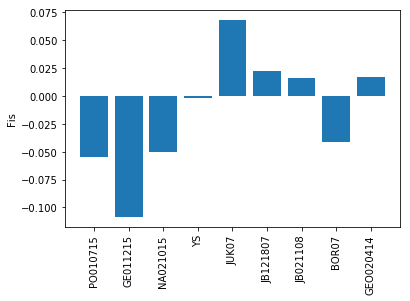

In [13]:
xpos = list(range(len(pops)))
plt.bar(xpos, fis)
plt.grid
plt.ylabel("Fis")
plt.xticks(xpos, pops, rotation = 90)
plt.show()

In [14]:
plt.close()